In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
pwd

u'/home/younguj/repo/abaqusPy/examples/one'

In [4]:
ls *.txt

diagnose.txt                          OneElement_90_UMAT_epl_MatF_None.txt
OneElement_00_UMAT_epl_MatF_None.txt  statev.txt
OneElement_45_UMAT_epl_MatF_None.txt


In [5]:
!head -n 3 OneElement_00_UMAT_mises_MatF_None.txt

head: cannot open `OneElement_00_UMAT_mises_MatF_None.txt' for reading: No such file or directory


In [6]:
ls *.txt

diagnose.txt                          OneElement_90_UMAT_epl_MatF_None.txt
OneElement_00_UMAT_epl_MatF_None.txt  statev.txt
OneElement_45_UMAT_epl_MatF_None.txt


In [7]:
fns=glob.glob('OneElement_??_UMAT_*_MatF_None.txt')
fns.sort()
def pall(fn):
    dat=np.loadtxt(fn)
    fig=plt.figure(figsize=(9,3.0));
    ax1=fig.add_subplot(121)
    
    for i in xrange(len(dat)):
        ax1.plot(dat[i]/mpa)
def main(fn):
    dat=np.loadtxt(fn).T
    fig=plt.figure(figsize=(12,3.0));
    ax1=fig.add_subplot(131)
    ax2=fig.add_subplot(132)
    ax3=fig.add_subplot(133)
    mpa=1e6

    #   0,  1,   2,   3,   4,   5,   6
    # e11,s11,pe11,pe22,time,ee11,ee22
    # pe33=-pe11-pe22
    pe33 = -dat[2]-dat[3]
    rv=dat[3]/pe33

    ax1.plot(dat[2],dat[1]/mpa,'-',label=r'$\varepsilon^\mathrm{total}$ vs. $\sigma_{11}$')
    ax2.plot(dat[4],dat[2],'b-',label=r'$\varepsilon_{11}^{pl}$')
    ax2.plot(dat[4],dat[3],'b--',label=r'$\varepsilon_{22}^{pl}$')    
    ax2.plot(dat[4],dat[5],'g-',label=r'$\varepsilon_{11}^{el}$')
    ax2.plot(dat[4],dat[6],'g-',label=r'$\varepsilon_{22}^{el}$')
    ax3.plot(dat[4],rv,label='r-value')
    #ax1.plot(dat[2],dat[1]/mpa,'x-',label=r'$\varepsilon^\mathrm{plastic}$ vs. $\sigma_{11}$')

    ax1.set_ylabel(r'Flow stress $\sigma$ [MPa]')
    ax1.set_xlabel(r'Total strain $\varepsilon$')
    ax2.set_xlabel('Time [sec]')
    
    ax3.set_ylim(0,3)

    ax1.legend(framealpha=0.5,fontsize=9,numpoints=1,bbox_to_anchor=(1.0,1.2),ncol=4)
    ax2.legend(framealpha=0.5,fontsize=9,numpoints=1,bbox_to_anchor=(1.0,1.2),ncol=4)

/software/anaconda/2.5.0/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


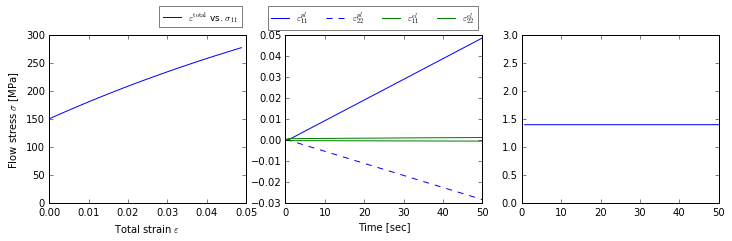

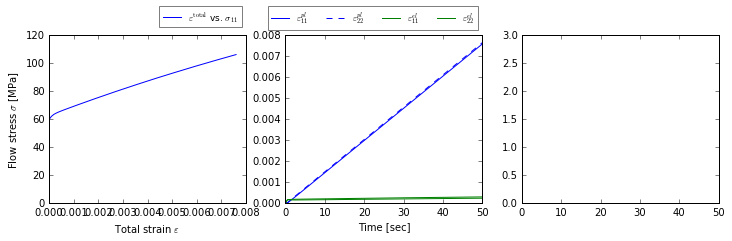

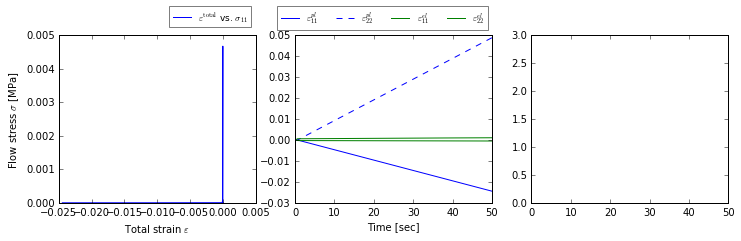

In [8]:
main(fns[0])
main(fns[1])
main(fns[2])